### Import package

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Image Generator

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [4]:
train_dir = r'C:\Users\user\Desktop\lemon\archive\horse-or-human\train'
train_generator = train_datagen.flow_from_directory(
    train_dir, # should be the directory that contains sub-dir and that contains images
    target_size=(300,300),
    batch_size=128,
    class_mode='binary', # categorical
)

Found 1027 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

validation_dir = r'C:\Users\user\Desktop\lemon\archive\horse-or-human\validation'
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'binary',
)

Found 256 images belonging to 2 classes.


### Defining a ConvNet to use complex images

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

### Compile 

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=.001),
              metrics=['acc'],
             )

### Fit Generator

In [8]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=8,
                             epochs=22,
                             validation_data=validation_generator,
                             validation_steps=8,
                             verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/22
8/8 - 7s - loss: 4807.4834 - acc: 0.5072 - val_loss: 0.6355 - val_acc: 0.5742
Epoch 2/22
8/8 - 5s - loss: 55.8420 - acc: 0.5228 - val_loss: 0.6020 - val_acc: 0.9414
Epoch 3/22
8/8 - 5s - loss: 2.6153 - acc: 0.8254 - val_loss: 0.5969 - val_acc: 0.8359
Epoch 4/22
8/8 - 5s - loss: 0.1875 - acc: 0.9644 - val_loss: 0.6122 - val_acc: 0.8359
Epoch 5/22
8/8 - 5s - loss: 0.0403 - acc: 0.9844 - val_loss: 0.6136 - val_acc: 0.8516
Epoch 6/22
8/8 - 5s - loss: 19.7769 - acc: 0.7508 - val_loss: 0.6230 - val_acc: 0.9102
Epoch 7/22
8/8 - 5s - loss: 0.1369 - acc: 0.9511 - val_loss: 0.6416 - val_acc: 0.8711
Epoch 8/22
8/8 - 6s - loss: 0.0435 - acc: 0.9814 - val_loss: 0.6432 - val_acc: 0.8633
Epoch 9/22
8/8 - 5s - loss: 0.0225 - acc: 0.9889 - val_loss: 0.6500 - val_acc: 0.8008
Epoch 10/22
8/8 - 5s - loss: 0.0086 - acc: 1.0000 - val

### Plot Model

In [10]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


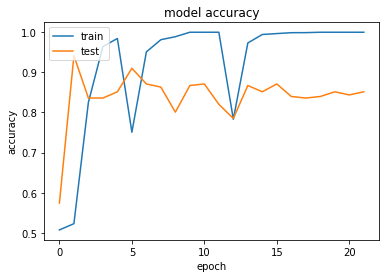

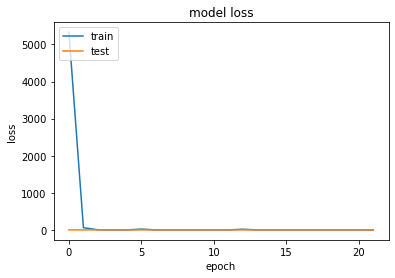

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predict or Evaluate Model

In [12]:
model.evaluate(validation_generator)

  ...
    to  
  ['...']
8/8 [==============================] - 1s 76ms/step - loss: 0.6076 - acc: 0.8516


[0.6075743138790131, 0.8515625]